In [44]:
# Import Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
# Check the current directory where the Python program is executing from
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: /Users/wilsonquizhpi/Homework-unite-4


In [36]:
# Read CSV
sp500_history_path = Path('sp500_history.csv')
algo_returns_path = Path('algo_returns.csv')
whale_retuns_path = Path('whale_returns.csv')

In [37]:
# Read in data and index by Date
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date")
sp500_history_df.head()
sp500_history_df.sort_index(inplace=True)

In [38]:
# Replacing the name Close to S&P 500 so we can have a good name
sp500_history_df.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_history_df.head()

,S&P 500
Date,
1-Apr-13,$1562.17
1-Apr-14,$1885.52
1-Apr-15,$2059.69
1-Apr-16,$2072.78
1-Apr-19,$2867.19


In [39]:
# dropping the $ (dollar sign) sing because it does not allow to work becuase it is a string
sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].str.replace("$", " ")
sp500_history_df.head()

/var/folders/yw/s7_xdw_d6p9231wbk6jwlsvm0000gn/T/ipykernel_8447/1582236261.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].str.replace("$", " ")


,S&P 500
Date,
1-Apr-13,1562.17
1-Apr-14,1885.52
1-Apr-15,2059.69
1-Apr-16,2072.78
1-Apr-19,2867.19


In [8]:
# going from string to float 
sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].astype('float')
sp500_history_df.dtypes


S&P 500    float64
dtype: object

In [9]:
# Changing the date fromat for S&P 500
from datetime import datetime
sp500_history_df.index = pd.to_datetime(sp500_history_df.index)
sp500_history_df.index = sp500_history_df.index.strftime('%Y/%m/%d')
sp500_history_df.head()

,S&P 500
Date,
2013/04/01,1562.17
2014/04/01,1885.52
2015/04/01,2059.69
2016/04/01,2072.78
2019/04/01,2867.19


In [10]:
# Read in data and index by Date
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date")
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [11]:
# Check for nulls
algo_returns_df.isnull().sum
#Drop missing values
algo_returns_df = algo_returns_df.dropna()
# Rechecking
algo_returns_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Algo 1  Algo 2
Date                      
2014-06-05   False   False
2014-06-06   False   False
2014-06-09   False   False
2014-06-10   False   False
2014-06-11   False   False
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1235 rows x 2 columns]>

In [12]:
# Changing the data for algo
from datetime import datetime
algo_returns_df.index = pd.to_datetime(algo_returns_df.index)
algo_returns_df.index = algo_returns_df.index.strftime('%Y/%m/%d')
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014/06/05,0.004062,0.013285
2014/06/06,0.001857,0.008284
2014/06/09,-0.005012,0.005668
2014/06/10,0.004406,-0.000735
2014/06/11,0.004760,-0.003761


In [13]:
# Calculate daily returns for sp500
sp500_history_return = sp500_history_df.pct_change()
sp500_history_return.head()

,S&P 500
Date,
2013/04/01,NaN
2014/04/01,0.206988
2015/04/01,0.092372
2016/04/01,0.006355
2019/04/01,0.383258


In [14]:
# Check for nulls for sp500
sp500_history_df.isnull().sum
#Drop missing values
sp500_history_df = sp500_history_df.dropna()
# Rechecking
sp500_history_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             S&P 500
Date               
2013/04/01    False
2014/04/01    False
2015/04/01    False
2016/04/01    False
2019/04/01    False
...             ...
2018/10/09    False
2013/09/09    False
2014/09/09    False
2015/09/09    False
2016/09/09    False

[1649 rows x 1 columns]>

In [15]:
# Read in data and index by Date
whale_retuns_df = pd.read_csv(whale_retuns_path, index_col="Date")
whale_retuns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [16]:
# Check for nulls for whale
whale_retuns_df.isnull().sum
#Drop missing values
whale_retuns_df = whale_retuns_df.dropna()
# Rechecking 
whale_retuns_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
2015-03-09                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03  

In [17]:
# Changing the date format for whale
from datetime import datetime
whale_retuns_df.index = pd.to_datetime(whale_retuns_df.index)
whale_retuns_df.index = whale_retuns_df.index.strftime('%Y/%m/%d')
whale_retuns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569
2015/03/04,0.002230,0.003241,-0.002534,0.004213
2015/03/05,0.004016,0.004076,0.002355,0.006726
2015/03/06,-0.007905,-0.003574,-0.008481,-0.013098
2015/03/09,0.000582,0.004225,0.005843,-0.001652


In [78]:
# Join sp500_history_return, whale_retuns_df, and algo_returns_df full datasets by axis
joined_data_return = pd.concat([whale_retuns_df, algo_returns_df, sp500_history_return], axis="columns", join="inner")
joined_data_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.141976
2015/03/04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,0.119867
2015/03/05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.121266
2015/03/06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,0.103477
2015/03/09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.144890


<AxesSubplot:title={'center':'daily returns for S&P 500'}, xlabel='Date'>

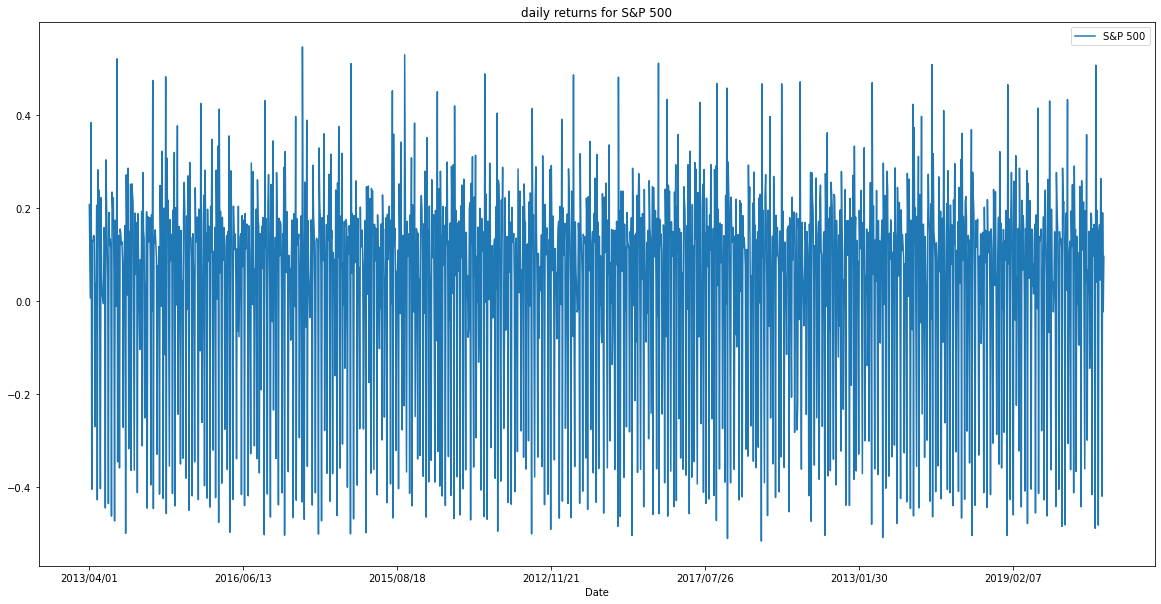

In [79]:
# Plot the daily returns of S&P 500, i am not sure what happend here,
# i change the index in ascending order and change the graph to this one
sp500_history_return.plot(figsize=(20,10), title= "daily returns for S&P 500")

<AxesSubplot:title={'center':'daily returns for algo '}, xlabel='Date'>

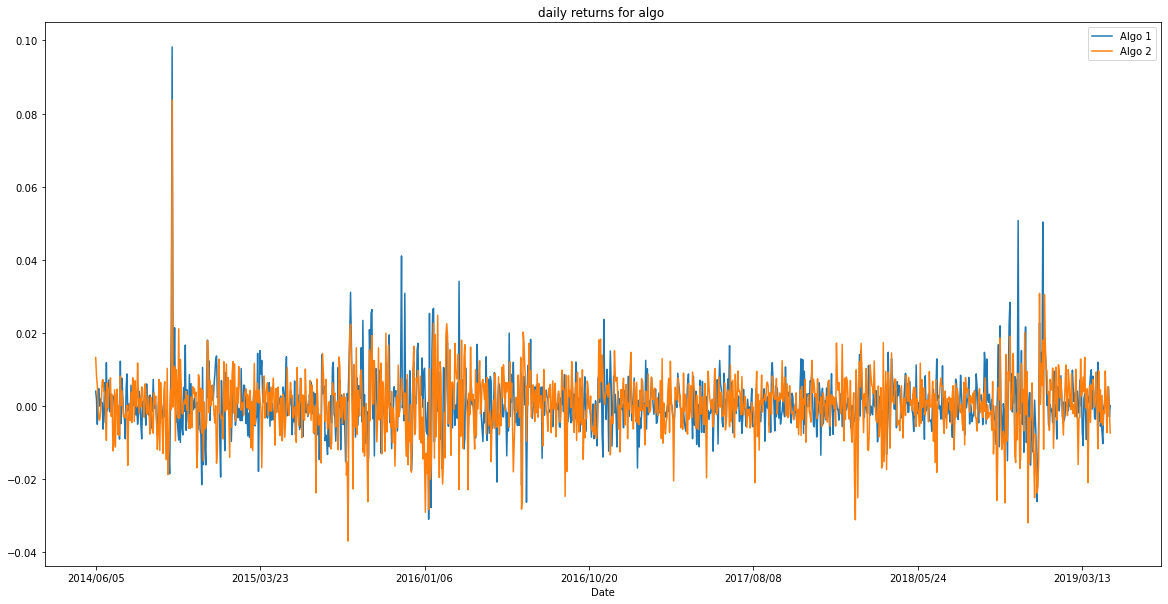

In [80]:
# Plot the daily returns of algo
algo_returns_df.plot(figsize=(20,10), title= "daily returns for algo ")

<AxesSubplot:title={'center':'daily returns for algo '}, xlabel='Date'>

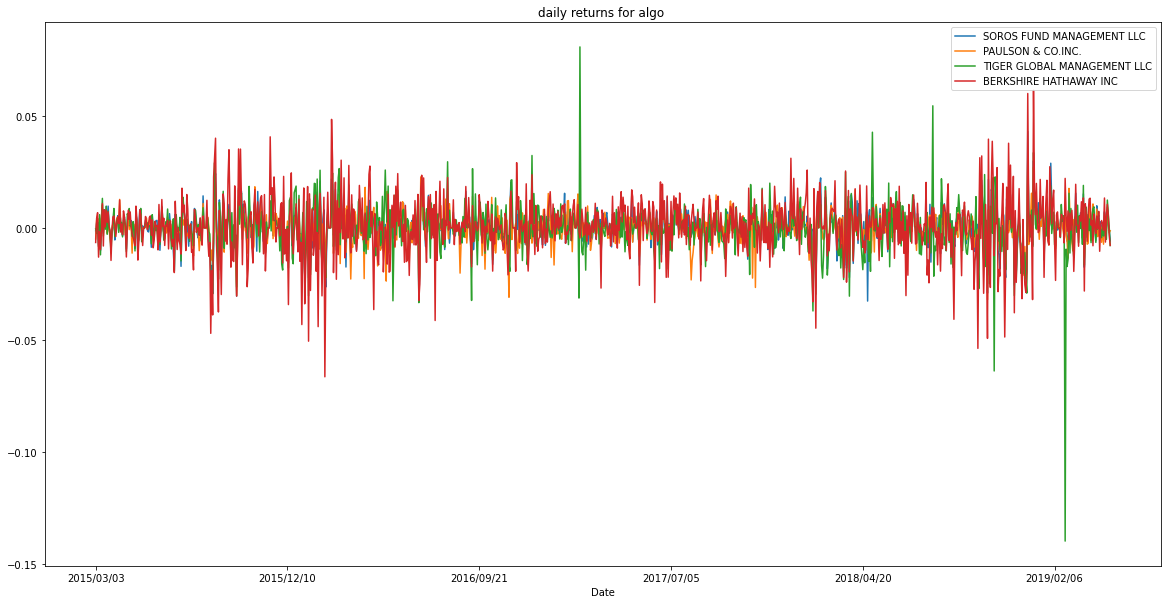

In [81]:
# Plot the daily returns of Whale
whale_retuns_df.plot(figsize=(20,10), title= "daily returns for algo ")

In [83]:
# Calculate the cumulative returns using the 'cumprod()' function for SP500
cumulative_return_SP500 = (1 + sp500_history_return).cumprod() - 1
cumulative_return_SP500.head(10)

,S&P 500
Date,
2013/04/01,NaN
2014/04/01,0.206988
2015/04/01,0.318480
2016/04/01,0.326859
2019/04/01,0.835389
2013/08/01,0.092628
2014/08/01,0.232356
2016/08/01,0.389631
2017/08/01,0.585199


In [84]:
# Calculate the cumulative returns using the 'cumprod()' function for algo
cumulative_return_algo = (1 + algo_returns_df).cumprod() - 1
cumulative_return_algo.head()

,Algo 1,Algo 2
Date,,
2014/06/05,0.004062,0.013285
2014/06/06,0.005927,0.021679
2014/06/09,0.000885,0.027470
2014/06/10,0.005295,0.026714
2014/06/11,0.010081,0.022852


In [85]:
# Calculate the cumulative returns using the 'cumprod()' function for whale
cumulative_return_whale = (1 + whale_retuns_df).cumprod() - 1
cumulative_return_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569
2015/03/04,0.000962,-0.001755,-0.003028,-0.002383
2015/03/05,0.004981,0.002314,-0.000681,0.004327
2015/03/06,-0.002963,-0.001269,-0.009156,-0.008828
2015/03/09,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:title={'center':'Cumulative Returns of s&p500 over 7 years'}, xlabel='Date'>

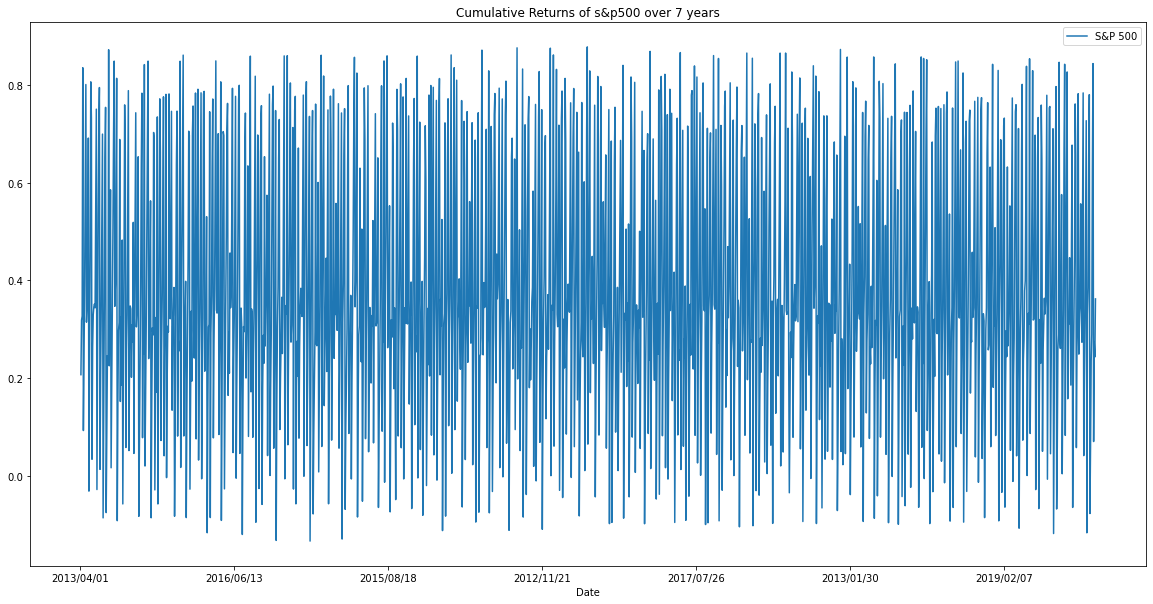

In [86]:
# Plot the daily returns of the S&P 500 over the last 7 years
cumulative_return_SP500.plot(figsize=(20,10), title="Cumulative Returns of s&p500 over 7 years")

<AxesSubplot:title={'center':'Cumulative Returns of algo over the Last 5 Years'}, xlabel='Date'>

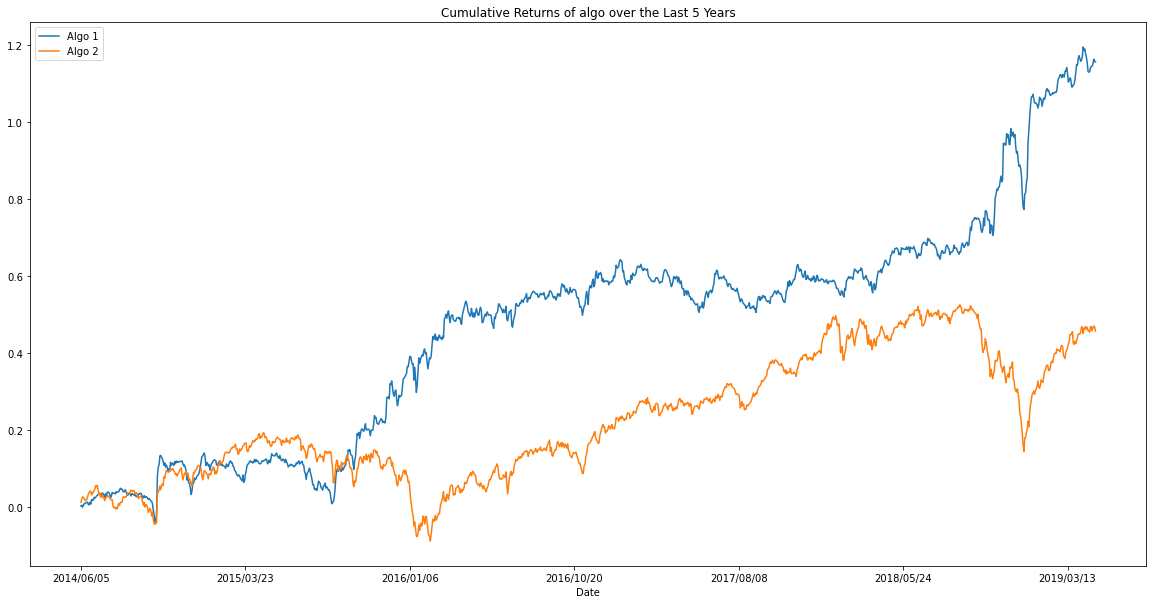

In [115]:
# Plot the daily returns of the algo over the last 5 years
cumulative_return_algo.plot(figsize=(20,10), title="Cumulative Returns of algo over the Last 5 Years")

<AxesSubplot:title={'center':'Cumulative Returns of MSFT over the Last 10 Years'}, xlabel='Date'>

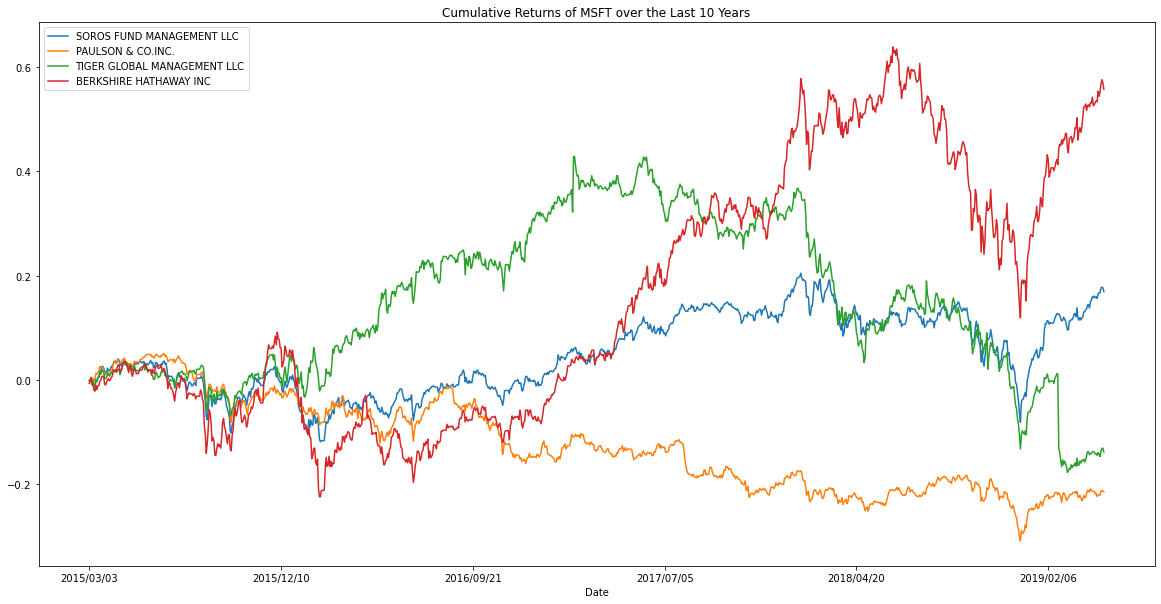

In [116]:
# Plot the daily returns of the over the last 4 years
cumulative_return_whale.plot(figsize=(20,10), title="Cumulative Returns of MSFT over the Last 4 Years")

In [89]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = joined_data_return.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
S&P 500                        2.037057
dtype: float64

<AxesSubplot:xlabel='Date'>

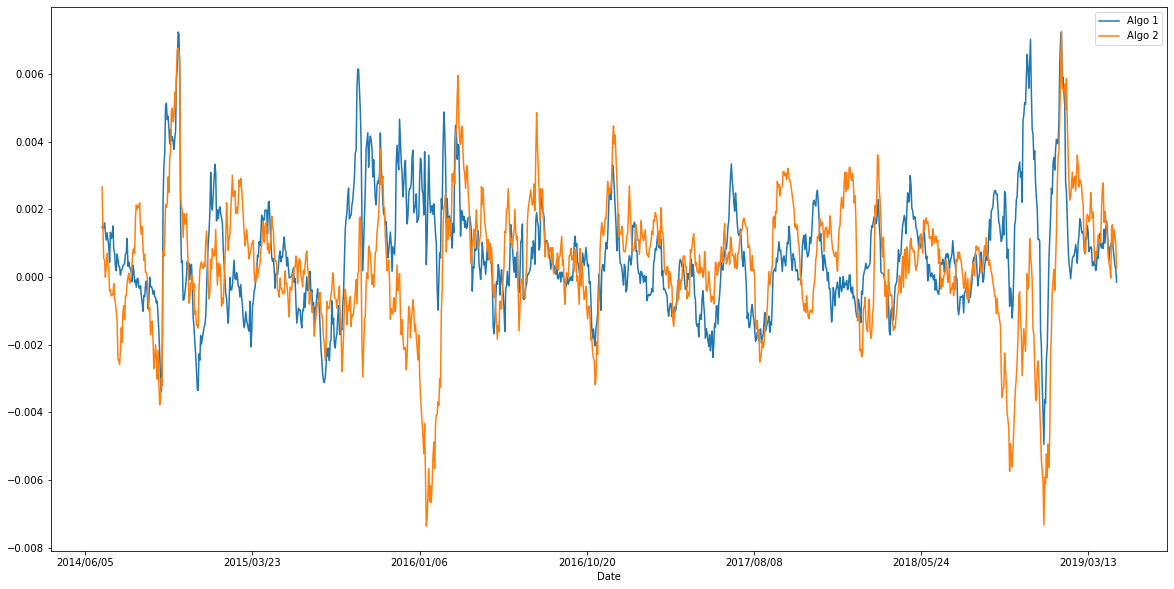

In [90]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
# Plot a rolling 7-day mean of TSLA's closing prices
algo_returns_df.rolling(window=21).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

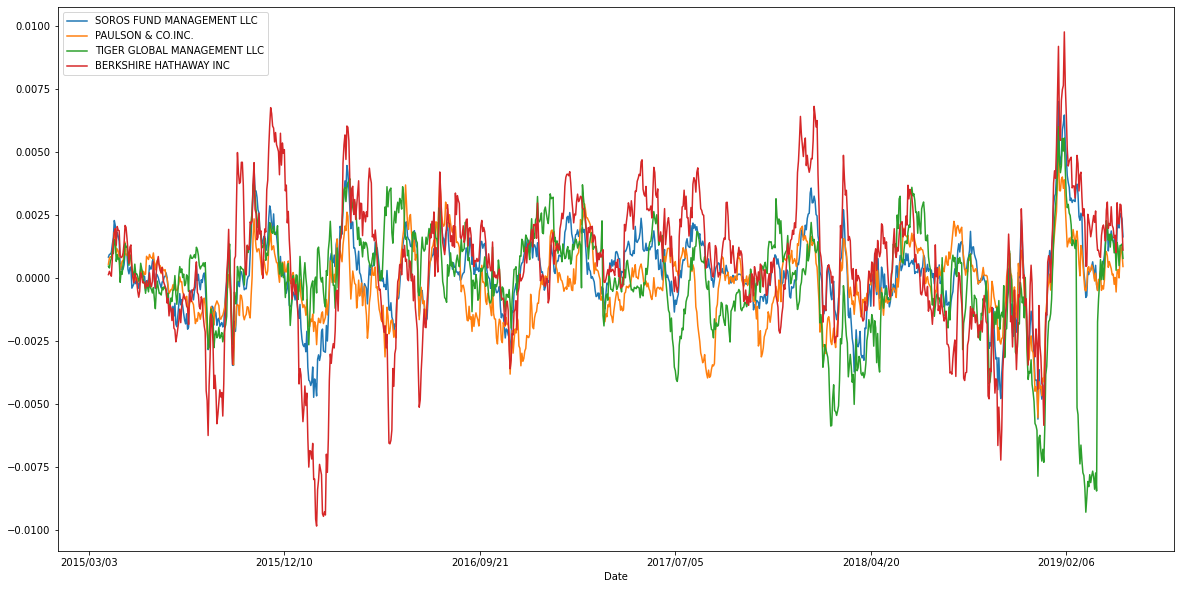

In [91]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
# Plot a rolling 7-day mean of TSLA's closing prices
whale_retuns_df.rolling(window=21).mean().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

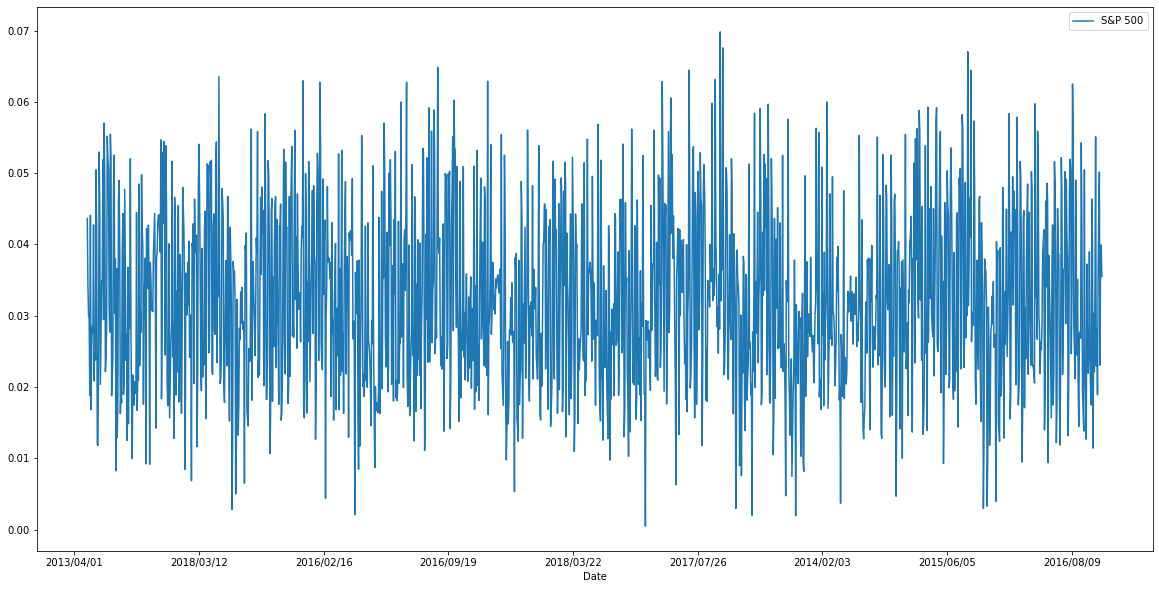

In [92]:
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
# Plot a rolling 7-day mean of TSLA's closing prices
sp500_history_return.rolling(window=21).mean().plot(figsize=(20,10))

<AxesSubplot:>

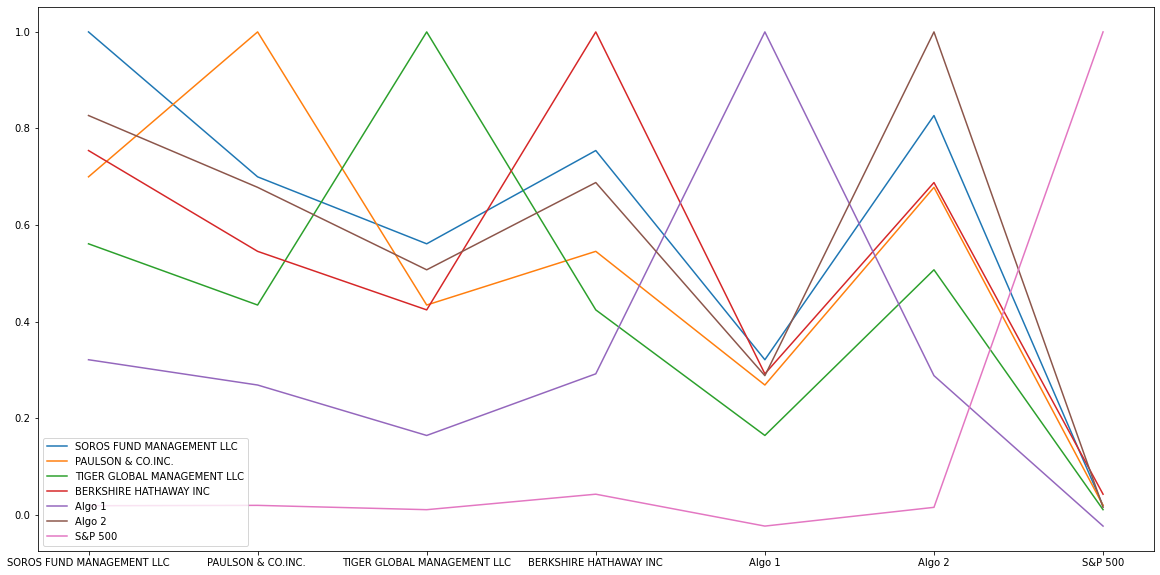

In [93]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = joined_data_return.corr().plot(figsize=(20,10))
correlation

In [94]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = algo_returns_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [95]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility for SP500
volatility = sp500_history_return.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

S&P 500    3.70563
dtype: float64

In [96]:
# Calculate covariance of all daily returns of algo vs. S&P 500
covariance = joined_data_return['Algo 1'].cov(joined_data_return['S&P 500'])
covariance

-2.2749168329428028e-05

In [97]:
# Calculate variance of all daily returns for S&P 500
variance = joined_data_return['S&P 500'].var()
variance

0.016466665107669864

In [98]:
# Calculate beta of all daily returns of algo
algo1_beta = covariance / variance
algo1_beta

-0.0013815285718558697

<AxesSubplot:title={'center':'Rolling 60-Day Variance of S&P 500 Returns'}, xlabel='Date'>

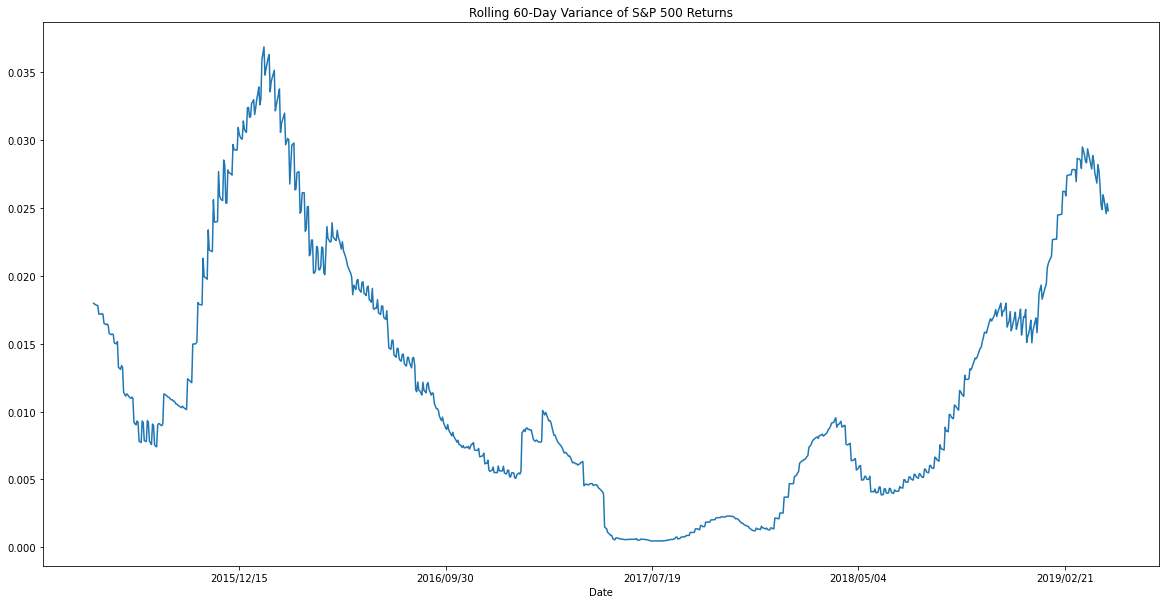

In [117]:
# Calculate 60-day rolling variance for S&P 500 and plot the data
rolling_variance = joined_data_return['S&P 500'].rolling(window=60).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 60-Day Variance of S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of algo 1 Returns vs. S&P 500 Returns'}, xlabel='Date'>

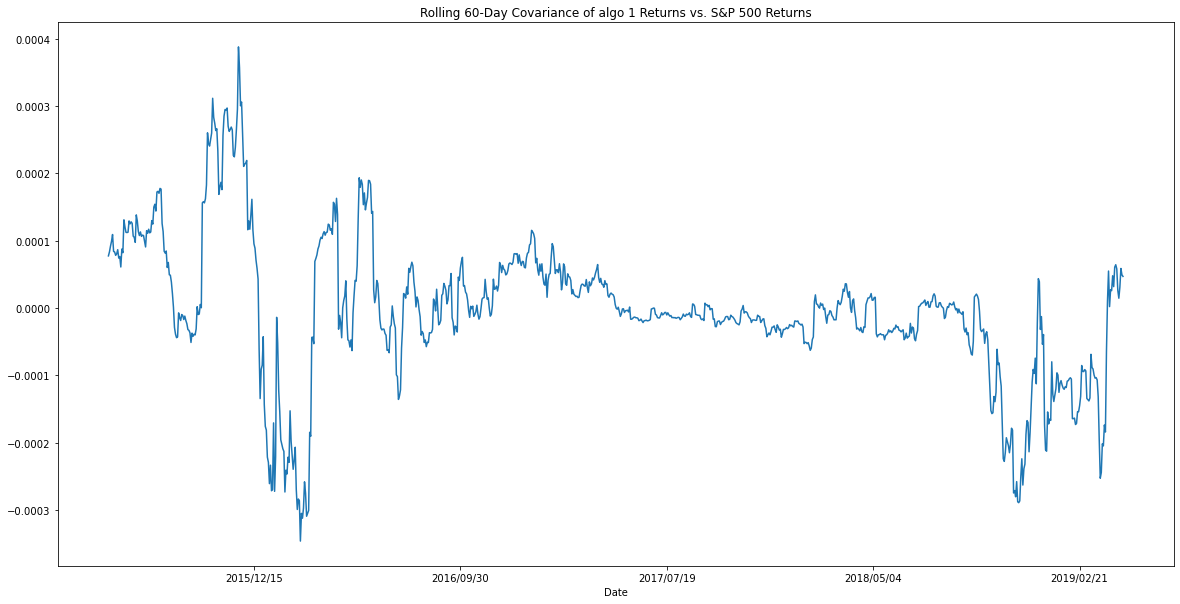

In [100]:
# Calculate 60-day rolling covariance of algo1 vs. S&P 500 and plot the data
rolling_covariance = joined_data_return['Algo 1'].rolling(window=60).cov(joined_data_return['S&P 500'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of algo 1 Returns vs. S&P 500 Returns')

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

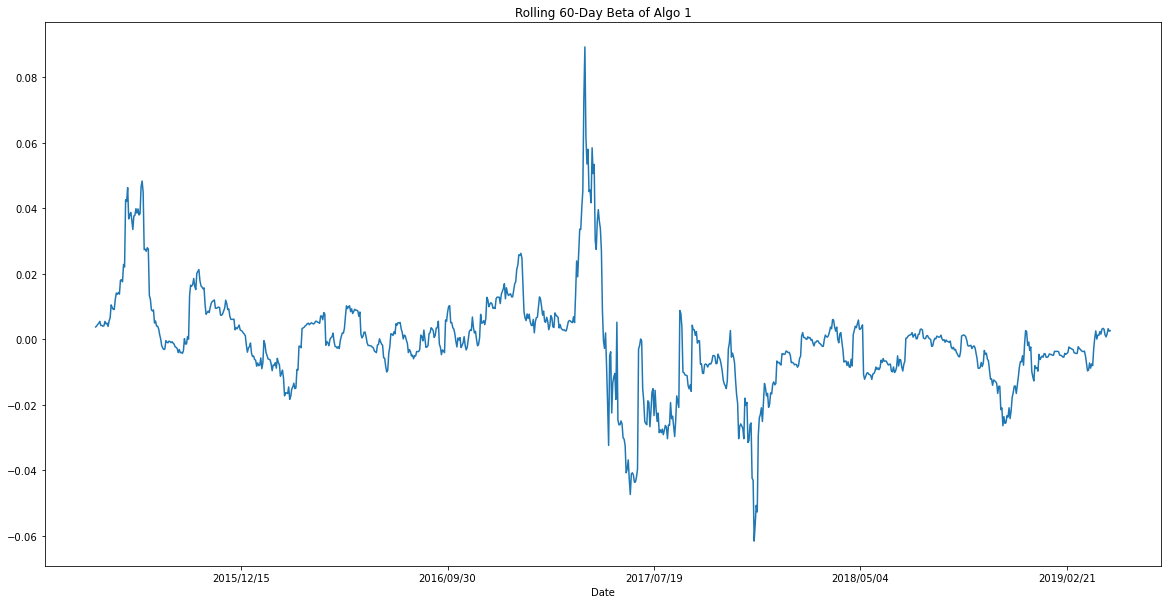

In [101]:
# Calculate 60-day rolling beta of Algo 1 and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

In [102]:
#Alternative to calucalte a rolling window is to take the exponentially weight moving average
joined_data_return['EMA_False'] = joined_data_return.iloc[:,0].ewm(span=5, adjust=False).mean()
joined_data_return['EMA_True'] = joined_data_return.iloc[:,0].ewm(span=5).mean()
joined_data_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,EMA_False,EMA_True
Date,,,,,,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.141976,-0.001266,-0.001266
2015/03/04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,0.119867,-0.000100,0.000832
2015/03/05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.121266,0.001272,0.002340
2015/03/06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,0.103477,-0.001787,-0.001916
2015/03/09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.144890,-0.000997,-0.000957


<AxesSubplot:>

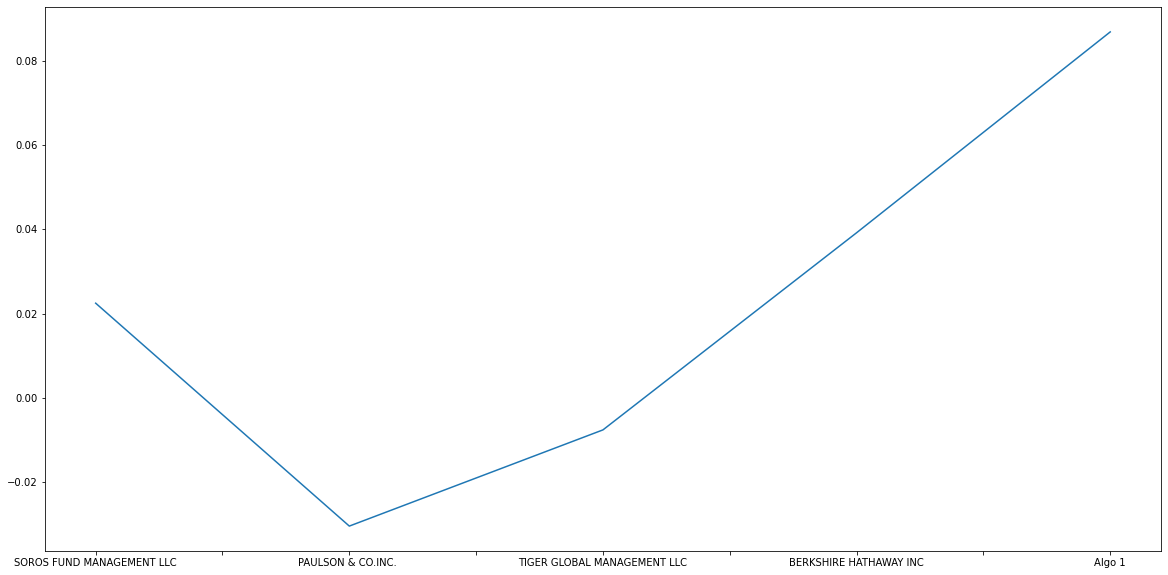

In [112]:
# Use the `mean` and `std` functions to calculate sharpe ratio and plot.
sharpe_ratios = joined_data_return.mean() / joined_data_return.std()
sharpe_ratios.head().plot(figsize=(20, 10))

<AxesSubplot:>

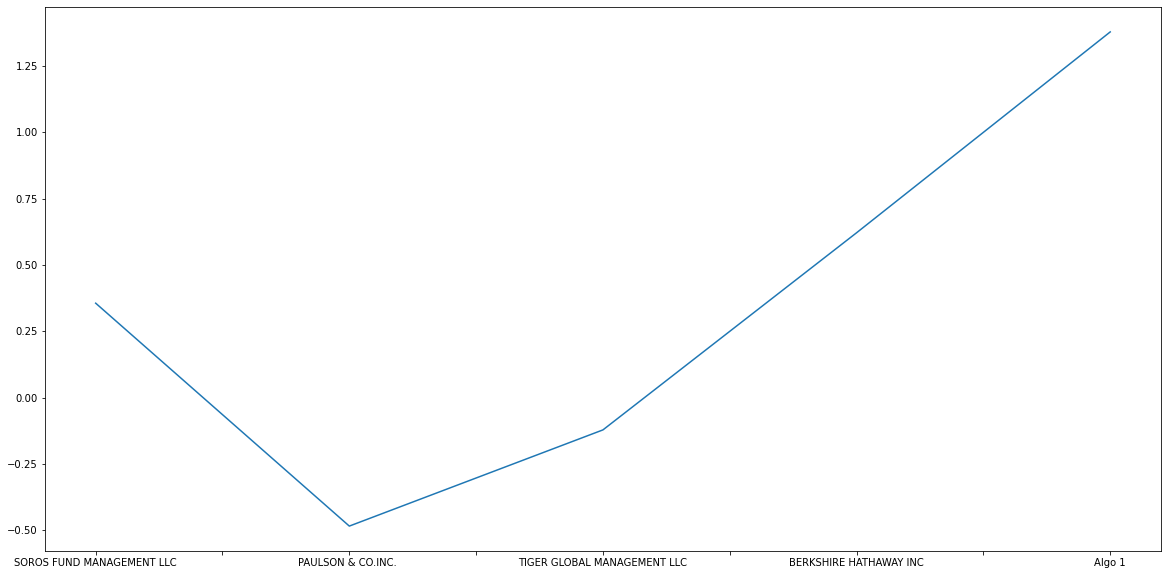

In [114]:
# calculate sharpe ratio and plot for a year.
annual_sharp_ratio = sharpe_ratios*252**.5
annual_sharp_ratio.head().plot(figsize=(20, 10))